#  **Classifying class 3 from class 4 patients (mild from mild-severe epilepsy)**
The project consist in the classification of **EEG signals** that comes from patients affected by epilepsy. Furthermore the possible classes among all the individuals are identified by the level of seizures that falls in the range **1 to 5**.

The classification will be performed with **Support Vector Machine (SVM)**


In [ ]:
!pip install scikit_posthocs;

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import friedmanchisquare
import statsmodels.api as sm
from scipy.stats import tiecorrect, rankdata
import scikit_posthocs as sp

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from imblearn.metrics import specificity_score
from imblearn.metrics import sensitivity_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

from imblearn.over_sampling import SMOTE


Here we have mounted the Drive folder where the dataset is stored

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

%cd /content/drive/My Drive/healthcare/

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Mounted at /content/drive/
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-151-d40c043e2a3a>", line 4, in <cell line: 4>
    get_ipython().run_line_magic('cd', '/content/drive/My Drive/healthcare/')
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/pytho

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-151-d40c043e2a3a>", line 4, in <cell line: 4>
    get_ipython().run_line_magic('cd', '/content/drive/My Drive/healthcare/')
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2418, in run_line_magic
    result = fn(*args, **kwargs)
  File "<decorator-gen-85>", line 2, in cd
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magic.py", line 187, in <lambda>
    call = lambda f, *a, **k: f(*a, **k)
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/magics/osm.py", line 342, in cd
    oldcwd = os.getcwd()
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython

## **Data Preprocessing**

Load the dataset

In [ ]:
eeg = pd.read_csv("EEG-data.csv");


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-151-5f449938808c>", line 1, in <cell line: 1>
    eeg = pd.read_csv("EEG-data.csv");
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 912, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 577, in _read
    parser = TextFileReader(filepath_or_buffer, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 1407, in __init__
    self._engine = self._make_engine(f, self.engine)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 1661, in _make_engine
    self.handles = get_handle(
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/common.py", line 859, in get_handle
    handle = 

In [ ]:
eeg.head()

In [ ]:
eeg.describe()
eeg.loc[4].describe()

We checked if our dataset is balanced

In [ ]:
target_count = eeg['y'].value_counts()
target_count

target_count = eeg['y'].value_counts()
print(f'3 : {target_count[3]}')
print(f'4 : {target_count[4]}')
print(f'Percentage of Majority Class: {round(target_count[1] / sum(target_count), 4)*100}')
print(f'Percentage of Minority Class: {round(target_count[2] / sum(target_count), 4)*100}')
print(f'Percentage of Minority Class: {round(target_count[3] / sum(target_count), 4)*100}')
print(f'Percentage of Minority Class: {round(target_count[4] / sum(target_count), 4)*100}')
print(f'Percentage of Minority Class: {round(target_count[5] / sum(target_count), 4)*100}')

target_count.plot(kind='bar', title='Count (target)')


We checked if there are null values

In [ ]:
eeg.isnull().any(axis=1).sum()

Now we show the signal shape

In [ ]:
t=range(0,eeg.shape[1])
y=eeg.loc[2]

plt.figure(figsize=(10,6))
plt.plot(t,y)

### Class 3 and 4 selection

Now we are considering just the class 3 and 4 (mild / mild-severe epilepsy)

In [ ]:
class_3 = eeg.loc[eeg['y'] == 3, eeg.columns[1:]]
class_4 = eeg.loc[eeg['y'] == 4, eeg.columns[1:]]
class_3.head()


In [ ]:
class_3.describe()

In [ ]:
class_4.describe()

We compute the mean and then we plot the mean signal for class 3

In [ ]:
mean_3 = class_3.mean()


t = range(0, mean_3.shape[0])
plt.figure(figsize=(10,6))
plt.plot(t, mean_3)

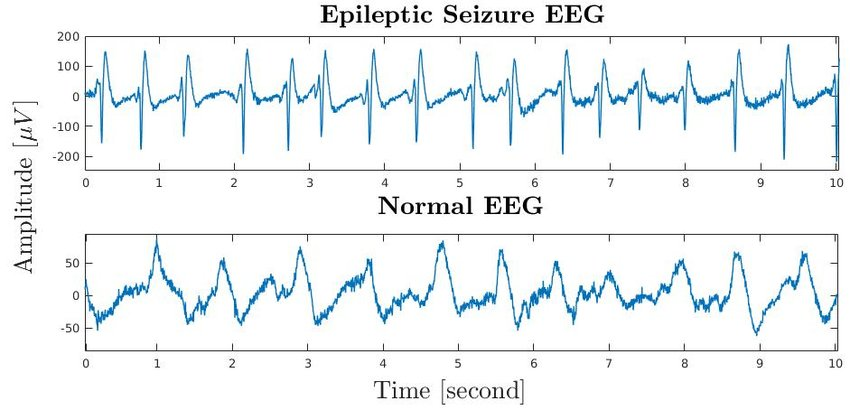

We compute the mean and then we plot the mean signal for class 4

In [ ]:
mean_4 = class_4.mean()

t = range(0, mean_4.shape[0])
plt.figure(figsize=(10,6))
plt.plot(t, mean_4)

### **Outliers detection**

We want to detect outliers in our dataset. From a statistical point of view we should use, as heuristic, a value of 2.5 to detect ouliers but considering the domain we decided to use a value of 5.

We have chosen this value


We standardized the samples values

In [ ]:
scaler = StandardScaler()
scaled_3 = pd.DataFrame(scaler.fit_transform(class_3), index=class_3.index)
scaled_4 = pd.DataFrame(scaler.fit_transform(class_4), index=class_4.index)

In [ ]:
data = pd.concat([class_4,class_3])
scaled = scaler.fit_transform(data)

In [ ]:
sns.heatmap(data.isnull())

In [ ]:
data.shape

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(t,scaled_3.transpose())
plt.axhline(y=5, color='black')
plt.axhline(y=-5, color='black')

print(scaled_3.mean())
print(scaled_3.std())

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(t,scaled_4.transpose())
plt.axhline(y=5, color='black')
plt.axhline(y=-5, color='black')

print(scaled_4.mean())
print(scaled_4.std())

After visual inspection we find the indices of outliers contained in the dataset

In [ ]:
outliers_indices_3 = []

for idx, row in scaled_3.iterrows():
    if (np.abs(row) > 5).any():  # Verifica se almeno un valore nella riga supera il valore assoluto di 5
        outliers_indices_3.append(idx)

# Se hai bisogno degli array numpy effettivi in seguito, puoi recuperarli utilizzando gli indici
outliers_3 = scaled_3.loc[outliers_indices_3]
print(np.shape(outliers_3))

In [ ]:
outliers_indices_4 = []

for idx, row in scaled_4.iterrows():
    if (np.abs(row) > 5).any():  # Verifica se almeno un valore nella riga supera il valore assoluto di 5
        outliers_indices_4.append(idx)

# Se hai bisogno degli array numpy effettivi in seguito, puoi recuperarli utilizzando gli indici
outliers_4 = scaled_4.loc[outliers_indices_4]
print(np.shape(outliers_4))

We found 6 outliers

In [ ]:
len(outliers_3 + outliers_4)

In [ ]:
#outliers=np.array(outliers)
#outliers[:,4095]
#count_class3 = np.count_nonzero(outliers==-1)
#count_class4 = np.count_nonzero(outliers==1)

In [ ]:
#print(f'# of class 3 outliers: {count_class3}\n# of class 4 outliers {count_class4}')

Now we have created the dataframe starting from the scaled values, exluding outliers

In [ ]:
outliers_all = np.concatenate((outliers_3,outliers_4), axis=0)
outliers_all_indices = np.concatenate((outliers_indices_3, outliers_indices_4), axis=0)
#print(outliers_indices)

data = data.drop(outliers_all_indices)
data.shape[0]

##Whole Dataset Standardization

In this section we've standardized our dataset (exluding the target variable) so it will be suitable for PCA and Model training.

In [ ]:
df = pd.DataFrame(data)
col = df.columns.tolist()

X = df.drop("y", axis=1)
Y = df["y"]

X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled)

In [ ]:
plt.plot(X_scaled.transpose());

In [ ]:
X_scaled.mean()

In [ ]:
# Calculate the eigenvalues and eigenvectors
cov = X_scaled.iloc[:,:-1].cov()
eig_vals, eig_vecs = np.linalg.eig(cov)

total_variance = X_scaled.var().sum()
print(f"Total variance: {total_variance:.2f}")

# Calculate the sum of the eigenvalues
eig_vals_sum = eig_vals.sum()
print(f"Sum of eigenvalues: {eig_vals_sum:.2f}")

In [ ]:
# Calculate the proportion of variance explained by each principal component
var_exp = eig_vals / total_variance
print(f"Proportion of variance explained by each principal component:\n{var_exp}")

In [ ]:
kaiser_rule = np.where(eig_vals > 1)[0]
print(kaiser_rule)

In [ ]:
pca = PCA(n_components=len(kaiser_rule))
data_reducted = pca.fit_transform((X_scaled.iloc[:,:-1]))

## Split Data

In [ ]:
#X= data.drop('y', axis=1)
#y=data['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,Y, test_size=0.2, stratify=Y,random_state=150)

### SVM

Now we set-up the pipeline

In [ ]:
pipeline = imbpipeline(steps = [
                                ['classifier',SVC(kernel=None,
                                                  gamma=None,
                                                  C=None,
                                                  probability=True)]])

Here we instantiate an StratifiedKFold object

In [ ]:
stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=250)

Here we define a parameters grid thus used in the instantiation of of grid_search, which is an GridSearchCV object

In [ ]:
# in param_grid are defined the hyperparameters
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','rbf']
              }

new_params = {'classifier__' + key: param_grid[key] for key in param_grid}

grid_search_SVM = GridSearchCV(estimator=pipeline,
                           param_grid=new_params,
                           scoring='accuracy',
                           cv=stratified_kfold,
                           verbose = 5,
                           n_jobs=-1) # it will use all the cpus available

Now we perform the grid search which find the best solution in the search space, where each element is a model fitted on some folds of data and with specific hyperparameters.

In [ ]:
# finding the best model
grid_search_SVM.fit(X_train, y_train.values.ravel())

best_estimator = grid_search_SVM.best_estimator_
cv_score = grid_search_SVM.best_score_
best_params = grid_search_SVM.best_params_

print(f'Best parameters: {best_params}')
print(f'Cross-validation score: {cv_score}')

# effetuamo la predizione sul set di test
y_test_predict_SVC = grid_search_SVM.predict(X_test)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/initializers.py:28: UserWarning: Unable to introspect viztracer state: [Errno 107] Transport endpoint is not connected
  warnings.warn(f"Unable to introspect viztracer state: {e}")
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-185-fd8f1abd8217>", line 2, in <cell line: 2>
    grid_search_SVM.fit(X_train, y_train.values.ravel())
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1388, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1950, in 

In [ ]:
y_test_predict_SVC = np.where(y_test_predict_SVC == 3, 0, np.where(y_test_predict_SVC == 4, 1, y_test_predict_SVC))

In [ ]:
y_test = np.where(y_test.ravel() == 3, 0, np.where(y_test.ravel() == 4, 1, y_test))

In [ ]:
accuracy = accuracy_score(y_test, y_test_predict_SVC)
precision = precision_score(y_test, y_test_predict_SVC)
recall = recall_score(y_test, y_test_predict_SVC)
f1 = f1_score(y_test, y_test_predict_SVC)
specificity = specificity_score(y_test, y_test_predict_SVC)
sensitivity = sensitivity_score(y_test, y_test_predict_SVC)

ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_test_predict_SVC,
                                        cmap=plt.cm.Blues)

print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')
print(f'Specificity: {specificity}')
print(f'Sensitivity: {sensitivity}')



plt.plot()

In [ ]:
scoring_list = []
scoring_list.append(dict([
    ('Model', 'SVM'),
    ('Test Accuracy', round(accuracy, 3)),
    ('Precision', round(precision, 3)),
    ('Recall', round(recall, 3)),
    ('F1', round(f1, 3)),
    ('Specificity', round(specificity,3)),
    ('Sensitivity', round(sensitivity, 3))
     ]))

In [ ]:
y_scores_svm = best_estimator.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_scores_svm)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Random Forest

ritornare le feature sulle quali è stato addestrato l'albero migliore

In [ ]:
pipeline = imbpipeline(steps = [
                                ['classifier',RandomForestClassifier(n_estimators=None,
                                                                     max_depth=None,
                                                                     min_samples_split=None,
                                                                     #min_samples_leaf=None,
                                                                     bootstrap=None)]
                               ])

In [ ]:
# in param_grid are defined the hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    #'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

new_params = {'classifier__' + key: param_grid[key] for key in param_grid}

grid_search_RF = GridSearchCV(estimator=pipeline,
                           param_grid=new_params,
                           scoring='accuracy',
                           cv=stratified_kfold,
                           verbose = 5,
                           n_jobs=-1) # it will use all the cpus available

In [ ]:
# finding the best model
grid_search_RF.fit(X_train, y_train.values.ravel())

best_estimator = grid_search_RF.best_estimator_
cv_score = grid_search_RF.best_score_
best_params = grid_search_RF.best_params_

print(f'Best parameters: {best_params}')
print(f'Cross-validation score: {cv_score}')

# effetuamo la predizione sul set di test
y_test_predict_RF = grid_search_RF.predict(X_test)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/initializers.py:28: UserWarning: Unable to introspect viztracer state: [Errno 107] Transport endpoint is not connected
  warnings.warn(f"Unable to introspect viztracer state: {e}")
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/initializers.py:28: UserWarning: Unable to introspect viztracer state: [Errno 107] Transport endpoint is not connected
  warnings.warn(f"Unable to introspect viztracer state: {e}")
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-192-6322e499599b>", line 2, in <cell line: 2>
    grid_search_RF.fit(X_train, y_train.values.ravel())
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1388, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1950, in _

In [ ]:
y_test_predict_RF = np.where(y_test_predict_RF == 3, 0, np.where(y_test_predict_RF == 4, 1, y_test_predict_RF))

In [ ]:
accuracy = accuracy_score(y_test, y_test_predict_RF)
precision = precision_score(y_test, y_test_predict_RF)
recall = recall_score(y_test, y_test_predict_RF)
f1 = f1_score(y_test, y_test_predict_RF)
specificity = specificity_score(y_test, y_test_predict_RF)
sensitivity = sensitivity_score(y_test, y_test_predict_RF)

ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_test_predict_RF,
                                        cmap=plt.cm.Blues)

print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')
print(f'Specificity: {specificity}')
print(f'Sensitivity: {sensitivity}')



plt.plot()

In [ ]:
scoring_list.append(dict([
    ('Model', 'Random Forest'),
    ('Test Accuracy', round(accuracy, 3)),
    ('Precision', round(precision, 3)),
    ('Recall', round(recall, 3)),
    ('F1', round(f1, 3)),
    ('Specificity', round(specificity,3)),
    ('Sensitivity', round(sensitivity, 3))
     ]))

roc curve

In [ ]:
y_scores_rf = best_estimator.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Split Reduced Data(after PCA)

In [ ]:
data_reducted = pd.DataFrame(data_reducted)
X_red=data_reducted.copy()
#y=data['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_red,Y, test_size=0.2, stratify=Y, random_state=150)

### SVM - PCA

In [ ]:
pipeline = imbpipeline(steps = [
                                ['classifier',SVC(kernel=None,
                                                  gamma=None,
                                                  C=None)
                                                  probability=True]])

In [ ]:
#stratified_kfold = StratifiedKFold(n_splits=10,
 #                                      shuffle=True,
  #                                     random_state=11)

In [ ]:
# in param_grid are defined the hyperparameters
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','rbf']
              }

new_params = {'classifier__' + key: param_grid[key] for key in param_grid}

grid_search_SVM = GridSearchCV(estimator=pipeline,
                           param_grid=new_params,
                           scoring='accuracy',
                           cv=stratified_kfold,
                           verbose = 5,
                           n_jobs=-1) # it will use all the cpus available

In [ ]:
# finding the best model
grid_search_SVM.fit(X_train, y_train.values.ravel())

cv_score = grid_search_SVM.best_score_
best_params = grid_search_SVM.best_params_

print(f'Best parameters: {best_params}')
print(f'Cross-validation score: {cv_score}')

# effetuamo la predizione sul set di test
y_test_predict_SVM = grid_search_SVM.predict(X_test)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/initializers.py:28: UserWarning: Unable to introspect viztracer state: [Errno 107] Transport endpoint is not connected
  warnings.warn(f"Unable to introspect viztracer state: {e}")
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/initializers.py:28: UserWarning: Unable to introspect viztracer state: [Errno 107] Transport endpoint is not connected
  warnings.warn(f"Unable to introspect viztracer state: {e}")
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-202-60e88549a19a>", line 2, in <cell line: 2>
    grid_search_SVM.fit(X_train, y_train.values.ravel())
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1388, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1950, in 

In [ ]:
y_test_predict_SVM = np.where(y_test_predict_SVM == 3, 0, np.where(y_test_predict_SVM == 4, 1, y_test_predict_SVM))
y_test = np.where(y_test.ravel() == 3, 0, np.where(y_test.ravel() == 4, 1, y_test.ravel()))


In [ ]:
accuracy = accuracy_score(y_test, y_test_predict_SVM)
precision = precision_score(y_test, y_test_predict_SVM)
recall = recall_score(y_test, y_test_predict_SVM)
f1 = f1_score(y_test, y_test_predict_SVM)
specificity = specificity_score(y_test, y_test_predict_SVM)
sensitivity = sensitivity_score(y_test, y_test_predict_SVM)

ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_test_predict_SVM,
                                        cmap=plt.cm.Blues)

print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')
print(f'Specificity: {specificity}')
print(f'Sensitivity: {sensitivity}')



plt.plot()

In [ ]:
scoring_list.append(dict([
    ('Model', 'SVM-PCA'),
    ('Test Accuracy', round(accuracy, 3)),
    ('Precision', round(precision, 3)),
    ('Recall', round(recall, 3)),
    ('F1', round(f1, 3)),
    ('Specificity', round(specificity,3)),
    ('Sensitivity', round(sensitivity, 3))
     ]))

roc curve

In [ ]:
grid_search_SVM.best_estimator

y_scores_svm = best_estimator.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_scores_svm)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-205-cbc4d10f039d>", line 1, in <cell line: 1>
    grid_search_SVM.best_estimator
AttributeError: 'GridSearchCV' object has no attribute 'best_estimator'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/loc

### Random Forest - PCA

In [ ]:
pipeline = imbpipeline(steps = [
                                ['classifier',RandomForestClassifier(n_estimators=None,
                                                                     max_depth=None,
                                                                     min_samples_split=None,
                                                                     #min_samples_leaf=None,
                                                                     bootstrap=None)]
                               ])

In [ ]:
# in param_grid are defined the hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    #'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

new_params = {'classifier__' + key: param_grid[key] for key in param_grid}

grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=new_params,
                           scoring='accuracy',
                           cv=stratified_kfold,
                           verbose = 5,
                           n_jobs=-1) # it will use all the cpus available

In [ ]:
# finding the best model
grid_search_RF.fit(X_train, y_train.values.ravel())

cv_score = grid_search_RF.best_score_
best_params = grid_search_RF.best_params_

print(f'Best parameters: {best_params}')
print(f'Cross-validation score: {cv_score}')

# effetuamo la predizione sul set di test
y_test_predict_RF = grid_search_RF.predict(X_test)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/initializers.py:28: UserWarning: Unable to introspect viztracer state: [Errno 107] Transport endpoint is not connected
  warnings.warn(f"Unable to introspect viztracer state: {e}")
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/initializers.py:28: UserWarning: Unable to introspect viztracer state: [Errno 107] Transport endpoint is not connected
  warnings.warn(f"Unable to introspect viztracer state: {e}")
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-207-7ccecb03d02b>", line 2, in <cell line: 2>
    grid_search_RF.fit(X_train, y_train.values.ravel())
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1388, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1950, in _

In [ ]:
y_test_predict_RF = np.where(y_test_predict_RF == 3, 0, np.where(y_test_predict_RF == 4, 1, y_test_predict_RF))

In [ ]:
accuracy = accuracy_score(y_test, y_test_predict_RF)
precision = precision_score(y_test, y_test_predict_RF)
recall = recall_score(y_test, y_test_predict_RF)
f1 = f1_score(y_test, y_test_predict_RF)
specificity = specificity_score(y_test, y_test_predict_RF)
sensitivity = sensitivity_score(y_test, y_test_predict_RF)

ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_test_predict_RF,
                                        cmap=plt.cm.Blues)

print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')
print(f'Specificity: {specificity}')
print(f'Sensitivity: {sensitivity}')



plt.plot()

In [ ]:
scoring_list.append(dict([
    ('Model', 'Random Forest-PCA'),
    ('Test Accuracy', round(accuracy, 3)),
    ('Precision', round(precision, 3)),
    ('Recall', round(recall, 3)),
    ('F1', round(f1, 3)),
    ('Specificity', round(specificity,3)),
    ('Sensitivity', round(sensitivity, 3))
     ]))

roc curve

In [ ]:
y_scores_rf = best_estimator.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_scores_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-210-824e489e2af5>", line 1, in <cell line: 1>
    y_scores_rf = best_estimator.predict_proba(X_test)[:, 1]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 547, in predict_proba
    return self.steps[-1][1].predict_proba(Xt, **predict_proba_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 862, in predict_proba
    X = self._validate_X_predict(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 602, in _validate_X_predict
    X = self._validate_data(X, dtype=DTYPE, accept_sparse="csr", reset=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 588, in _validate_data
    self._check_n_features(X, reset=reset)
  File "/usr/local/lib/python3.10/dist-p

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-210-824e489e2af5>", line 1, in <cell line: 1>
    y_scores_rf = best_estimator.predict_proba(X_test)[:, 1]
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 547, in predict_proba
    return self.steps[-1][1].predict_proba(Xt, **predict_proba_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 862, in predict_proba
    X = self._validate_X_predict(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 602, in _validate_X_predict
    X = self._validate_data(X, dtype=DTYPE, accept_sparse="csr", reset=False)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 588, in _validate_data
    self._check_n_features(X, reset=reset)
  File "/usr/local/lib/python3.10/dist-p

## TEST

Abbiamo pensato di fare ANOVA ma viene meno la normality assumption

In [ ]:
cv_results_SVM = grid_search_SVM.cv_results_
cv_results_RF = grid_search_RF.cv_results_

stacked_results_SVM = np.hstack((cv_results_SVM['split0_test_score'],
                             cv_results_SVM['split1_test_score'],
                             cv_results_SVM['split2_test_score'],
                             cv_results_SVM['split3_test_score'],
                             cv_results_SVM['split4_test_score'],
                             cv_results_SVM['split5_test_score'],
                             cv_results_SVM['split6_test_score'],
                             cv_results_SVM['split7_test_score'],
                             cv_results_SVM['split8_test_score'],
                             cv_results_SVM['split9_test_score'],))

stacked_results_RF = np.hstack((cv_results_RF['split0_test_score'],
                             cv_results_RF['split1_test_score'],
                             cv_results_RF['split2_test_score'],
                             cv_results_RF['split3_test_score'],
                             cv_results_RF['split4_test_score'],
                             cv_results_RF['split5_test_score'],
                             cv_results_RF['split6_test_score'],
                             cv_results_RF['split7_test_score'],
                             cv_results_RF['split8_test_score'],
                             cv_results_RF['split9_test_score']))



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-210-4c9256d0e682>", line 1, in <cell line: 1>
    cv_results_SVM = grid_search_SVM.cv_results_
AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  Fil

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-210-4c9256d0e682>", line 1, in <cell line: 1>
    cv_results_SVM = grid_search_SVM.cv_results_
AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "/usr/l

In [ ]:
stacked_results_SVM.shape

In [ ]:
stacked_results_RF=stacked_results_RF.reshape((10,36))
stacked_results_SVM=stacked_results_SVM.reshape((10,50))

### Friedman

####Friedman SVM

In [ ]:
# Performing one-way Friedmann
statistic, p_value = friedmanchisquare(*stacked_results_SVM)

alpha = 0.05
print("Friedman test statistic:", statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis that the treatments have identical effects.")
else:
    print("Fail to reject the null hypothesis that the treatments have identical effects.")

#### Friedman RF

In [ ]:
# Performing one-way Friedmann
statistic, p_value = friedmanchisquare(*stacked_results_RF)

alpha = 0.05
print("Friedman test statistic:", statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis that the treatments have identical effects.")
else:
    print("Fail to reject the null hypothesis that the treatments have identical effects.")

#### CD

In [ ]:
# Conduct the Nemenyi post-hoc test
#pc = sp.posthoc_nemenyi_friedman(stacked_results)

In [ ]:
#pc

In [ ]:
#heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
#sp.sign_plot(pc, **heatmap_args)

## Normality Assumption

In [ ]:
pd.DataFrame(stacked_results_RF.reshape(360,1)).hist()

In [ ]:
pd.DataFrame(stacked_results_SVM.reshape(500,1)).hist()

In [ ]:
import numpy as np
import statsmodels.api as sm
import pylab as py

sm.qqplot(stacked_results_SVM.reshape(500,1), line ='45')
py.show()

sm.qqplot(stacked_results_RF.reshape(360,1), line ='45')
py.show()

####Shapiro test

In [ ]:
from scipy.stats import shapiro

# Esegui il test di Shapiro-Wilk
stat, p_value = shapiro(stacked_results_SVM.reshape(500,1))

# Stampa il risultato del test
print("Statistiche del test:", stat)
print("Valore p:", p_value)

# Interpreta il risultato del test
alpha = 0.05
if p_value > alpha:
    print("Non possiamo rigettare l'ipotesi nulla (i dati provengono da una distribuzione normale)")
else:
    p_value

In [ ]:
from scipy.stats import shapiro

# Esegui il test di Shapiro-Wilk
stat, p_value = shapiro(stacked_results_RF.reshape(360,1))

# Stampa il risultato del test
print("Statistiche del test:", stat)
print("Valore p:", p_value)

# Interpreta il risultato del test
alpha = 0.05
if p_value > alpha:
    print("Non possiamo rigettare l'ipotesi nulla (i dati provengono da una distribuzione normale)")
else:
    p_value

## Comparisons

In [ ]:
results = pd.DataFrame(data=scoring_list)
results = results[['Model',
                   'Test Accuracy',
                   'Precision',
                   'Recall',
                   'F1',
                   'Specificity',
                   'Sensitivity']]

results = results.sort_values(by='Test Accuracy', ascending=False)

results

In [ ]:
plt.bar(results['Model'], results['Specificity']);

## Oversampling

### Creation new Dataset

In [ ]:
data_copy=data.copy()

In [ ]:
data_copy

I take the 20% of samples of class 3

In [ ]:
nrows=int(data_copy.shape[0]*10/100)
nrows

In [ ]:
class_3_samples=data_copy.loc[data_copy['y']==3].sample(nrows)
class_3_samples.shape

In [ ]:
class_4_samples=data_copy.loc[data_copy['y']==4]

In [ ]:
new_data=pd.concat([class_3_samples,class_4_samples])


In [ ]:
target_count = new_data['y'].value_counts()
target_count

print(f'3: {target_count[3]}')
print(f'4: {target_count[4]}')
print(f'Percentage of Majority Class: {round(target_count[3] / sum(target_count), 4)*100}')
print(f'Percentage of Majority Class: {round(target_count[4] / sum(target_count), 4)*100}')

In [ ]:
target_count.plot(kind='bar', title='Count (target)')


In [ ]:
new_data

### Split Data

In [ ]:
X=new_data.drop('y',axis=1)
y=new_data['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify=y,random_state=11)

In [ ]:
y_train.value_counts()

In [ ]:
pipeline=imbpipeline(steps=[['smote', SMOTE()],
                            ['classifier',SVC(kernel=None,
                                          gamma=None,
                                          C=None)]])



In [ ]:
stratified_kfold = StratifiedKFold(n_splits=10,
                                       shuffle=True,
                                       random_state=11)

#### SVM

In [ ]:
# in param_grid are defined the hyperparameters
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear','rbf']
              }

new_params = {'classifier__' + key: param_grid[key] for key in param_grid}

grid_search_SVM = GridSearchCV(estimator=pipeline,
                           param_grid=new_params,
                           scoring='accuracy',
                           cv=stratified_kfold,
                           verbose = 5,
                           n_jobs=-1) # it will use all the cpus available

In [ ]:
# finding the best model
grid_search_SVM.fit(X_train, y_train.values.ravel())

cv_score = grid_search_SVM.best_score_
best_params = grid_search_SVM.best_params_

print(f'Best parameters: {best_params}')
print(f'Cross-validation score: {cv_score}')

# effetuamo la predizione sul set di test
y_test_predict_SVC = grid_search_SVM.predict(X_test)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/initializers.py:28: UserWarning: Unable to introspect viztracer state: [Errno 107] Transport endpoint is not connected
  warnings.warn(f"Unable to introspect viztracer state: {e}")
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/initializers.py:28: UserWarning: Unable to introspect viztracer state: [Errno 107] Transport endpoint is not connected
  warnings.warn(f"Unable to introspect viztracer state: {e}")
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-239-7cc56c22347d>", line 2, in <cell line: 2>
    grid_search_SVM.fit(X_train, y_train.values.ravel())
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 1388, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py", line 821, in evaluate_candidates
    out = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1950, in 

In [ ]:
# Access the oversampled training data
X_resampled, y_resampled = pipeline.named_steps['smote'].fit_resample(X, y)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-239-fb6d7e5ccfbc>", line 2, in <cell line: 2>
    X_resampled, y_resampled = pipeline.named_steps['smote'].fit_resample(X, y)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/base.py", line 203, in fit_resample
    return super().fit_resample(X, y)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/base.py", line 94, in fit_resample
    X_, y_ = arrays_transformer.transform(output[0], y_)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py", line 36, in transform
    X = self._transfrom_one(X, self.x_props)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py", line 56, in _transfrom_one
    ret = ret.astype(props["dtypes"])
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6336, 

In [ ]:
print(X_resampled.shape)
print(y_resampled.shape)
print(y_resampled.value_counts())

In [ ]:
data_tr_resambled=pd.concat([X_resampled,y_resampled], axis=1)

In [ ]:
data_tr=pd.concat([X_train,y_train], axis=1)

In [ ]:
# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot data_tr_resambled.T on the first subplot
axs[0].plot(t, data_tr_resambled.T)
axs[0].set_title('Data Resampled')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Value')

# Plot data_tr.T on the second subplot
axs[1].plot(t, data_tr.T)
axs[1].set_title('Original Data')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Value')

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
y_test_predict_SVC = np.where(y_test_predict_SVC == 3, 0, np.where(y_test_predict_SVC == 4, 1, y_test_predict_SVC))

In [ ]:
y_test = np.where(y_test.ravel() == 3, 0, np.where(y_test.ravel() == 4, 1, y_test))

In [ ]:
accuracy = accuracy_score(y_test, y_test_predict_SVC)
precision = precision_score(y_test, y_test_predict_SVC)
recall = recall_score(y_test, y_test_predict_SVC)
f1 = f1_score(y_test, y_test_predict_SVC)
specificity = specificity_score(y_test, y_test_predict_SVC)
sensitivity = sensitivity_score(y_test, y_test_predict_SVC)

ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_test_predict_SVC,
                                        cmap=plt.cm.Blues)

print(f'accuracy: {accuracy}')
print(f'precision: {precision}')
print(f'recall: {recall}')
print(f'f1: {f1}')
print(f'Specificity: {specificity}')
print(f'Sensitivity: {sensitivity}')



plt.plot()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-245-451e96b2465c>", line 1, in <cell line: 1>
    accuracy = accuracy_score(y_test, y_test_predict_SVC)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 86, in _check_targets
    check_consistent_length(y_true, y_pred)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 397, in check_consistent_length
    raise ValueError(
ValueError: Found input variables with inconsistent numbers of samples: [